In [2]:
%pip install openbb
%pip install sqlite_utils
from data import Data


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Gets singular stock
data = Data.get_price_data(symbol="META")
data

,date,open,high,low,close,volume,dividend
date,,,,,,,
2012-05-18,2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0.0
2012-05-21,2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0.0
2012-05-22,2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0.0
2012-05-23,2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0.0
2012-05-24,2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0.0
...,...,...,...,...,...,...,...
2025-12-24,2025-12-24,662.530029,668.179993,662.200012,667.549988,5627500,0.0
2025-12-26,2025-12-26,668.059998,668.950012,661.320007,663.289978,7133800,0.0
2025-12-29,2025-12-29,658.010010,660.250000,654.390015,658.690002,8506500,0.0


In [ ]:
data.describe()

,open,high,low,close,volume,dividend
count,3425.000000,3425.000000,3425.000000,3425.000000,3.425000e+03,3425.000000
mean,220.898791,223.693293,218.067518,220.923425,2.833143e+07,0.001197
std,178.766240,180.826572,176.446406,178.632241,2.519075e+07,0.024751
min,18.080000,18.270000,17.549999,17.730000,4.726100e+06,0.000000
25%,95.680000,96.879997,93.949997,95.260002,1.482890e+07,0.000000
50%,172.500000,174.570007,170.500000,172.500000,2.095550e+07,0.000000
75%,286.010010,289.790009,281.160004,286.750000,3.223670e+07,0.000000
max,791.150024,796.250000,780.820007,790.000000,5.735764e+08,0.525000


In [12]:
pct_change = data["close"].pct_change()

In [10]:
%pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


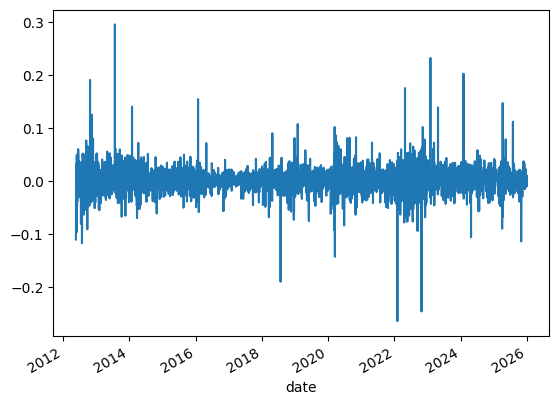

In [13]:
pct_change.plot()
plt.show()

In [14]:
pct_change.describe()

count    3424.000000
mean        0.001145
std         0.025018
min        -0.263901
25%        -0.010034
50%         0.000973
75%         0.012714
max         0.296115
Name: close, dtype: float64

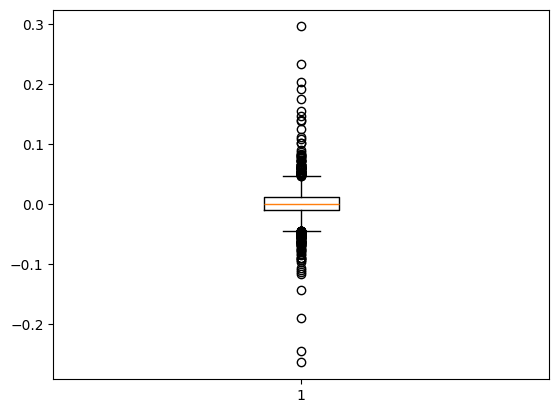

In [ ]:
pct_change = pct_change.dropna()
plt.boxplot(pct_change)
plt.show()

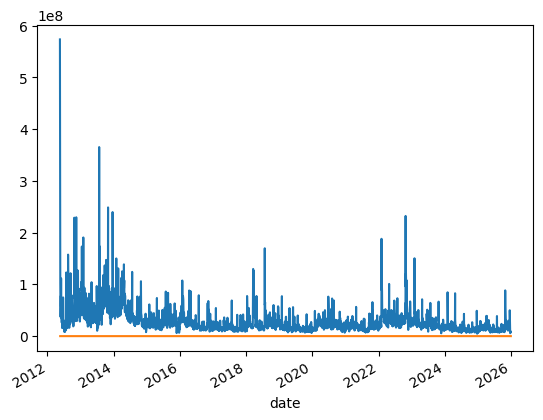

In [ ]:
data["volume"].plot()
data["close"].pct_change().plot()
plt.show()

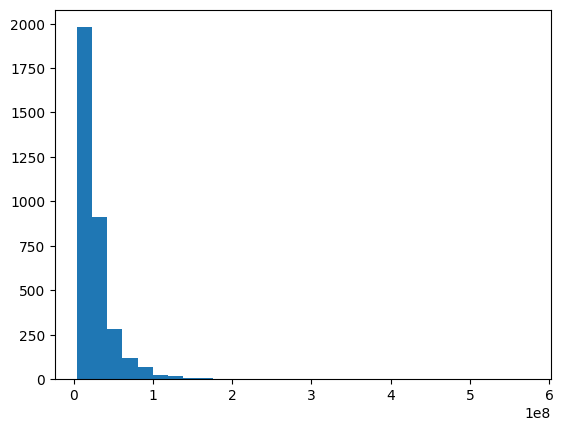

In [ ]:
plt.hist(data["volume"], bins=30)
plt.show()

In [ ]:
import math

def transform_log(val):
  return math.log(val)

data["transformed_volume"] = data["volume"].map()

SyntaxError: invalid syntax (3043779595.py, line 1)